In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
path = '/content/drive/MyDrive/01_ITE/Projects/Data_Science/datasets/'
cumtd_data = 'CUMTD_Route_Ridership_By_Day_September_2022_March_2023.csv'
data_file = path + cumtd_data # get the directory of the file

Mounted at /content/drive


In [ ]:
import os # if you want to be inside this directory
os.chdir('/content/drive/MyDrive/01_ITE/Projects/Data_Science')

In [ ]:
ls # check to see what files are inside this directory

Bus_Route_To_Analyze.gsheet                figures/
CUMTD_Bus_Routes_Main_Data_Analysis.ipynb  ITE_Data_Science_Notes.gdoc
CUMTD_Ridership_Per_Stop.csv               ITE_Data_Science_Rosters.gsheet
Data_Science_Project_Outline.gdoc          ITE_UIUC_ML.ipynb
datasets/                                  Transportation_Data_Science_Project.gdoc


**Definitions to keep in mind:** </br>
Stop In: Passengers coming in total  </br>
Stop Out: Passengers disembarking  </br>
Load Max: $$ Load Max = \frac{UsedCapacity}{TotalCapacity} $$ How much possible bandwidth that was used over time  </br>
Automatic Passenger Count (APC): Bus boarding and alighting data  </br>
Reference: https://www.transitwiki.org/TransitWiki/index.php/Main_Page

**Data Visualization**

In [ ]:
dataframe = pd.read_csv(data_file) # read in the csv file
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31T19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31T19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31T19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31T19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31T19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
9112,2023-03-30T19:00:00-05:00,TEAL LATE NIGHT,126,126,2.7,16,16
9113,2023-03-30T19:00:00-05:00,YELLOW,1866,1866,7.4,62,51
9114,2023-03-30T19:00:00-05:00,YELLOW EVENING,600,600,4.5,37,20
9115,2023-03-30T19:00:00-05:00,YELLOW LATE NIGHT,71,71,0.8,13,19


In [ ]:
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe

,Date,Line,In (Sum),Out (Sum),Load (Avg.),Load max,#APC-Trips
0,2022-08-31 19:00:00-05:00,1 YELLOW ALT,34,34,8.1,33,2
1,2022-08-31 19:00:00-05:00,10W GOLD ALT,47,47,14.6,43,1
2,2022-08-31 19:00:00-05:00,1N YELLOW ALT,140,140,24.0,87,2
3,2022-08-31 19:00:00-05:00,1N YELLOW ALT PM,41,41,15.5,41,1
4,2022-08-31 19:00:00-05:00,1S YELLOW ALT,120,120,8.2,56,3
...,...,...,...,...,...,...,...
9112,2023-03-30 19:00:00-05:00,TEAL LATE NIGHT,126,126,2.7,16,16
9113,2023-03-30 19:00:00-05:00,YELLOW,1866,1866,7.4,62,51
9114,2023-03-30 19:00:00-05:00,YELLOW EVENING,600,600,4.5,37,20
9115,2023-03-30 19:00:00-05:00,YELLOW LATE NIGHT,71,71,0.8,13,19


In [ ]:
columns = dataframe.keys() # just to see the column properties
print(f'Columns: {columns}')

Columns: Index(['Date', 'Line', 'In (Sum)', 'Out (Sum)', 'Load (Avg.)', 'Load max',
       '#APC-Trips'],
      dtype='object')


In [ ]:
dates_analyzed = dataframe['Date'].unique()
print(f'Dates analyzed: {dates_analyzed}')

Dates analyzed: [datetime.datetime(2022, 8, 31, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 1, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 2, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 3, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 5, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 6, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 7, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 8, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 9, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 10, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 11, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 12, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 13, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.datetime(2022, 9, 14, 19, 0, tzinfo=tzoffset(None, -18000))
 datetime.da

In [ ]:
bus_lines = dataframe['Line'].unique() # we want to see how many unique bus lines there are
print(f'CUMTD bus lines: {bus_lines}')

CUMTD bus lines: ['1 YELLOW ALT' '10W GOLD ALT' '1N YELLOW ALT' '1N YELLOW ALT PM'
 '1S YELLOW ALT' '3S LAVENDER ALT' '5E GREEN EXPRESS 1 ALT'
 '5E GREEN EXPRESS ALT' '5W GREEN ALT 2' '5W GREEN EXPRESS 2'
 '7E GREY ALT' '7W GREY ALT' 'BLUE' 'BRONZE' 'BRONZE ALT' 'BROWN'
 'BROWN ALT' 'BROWN ALT PM' 'BROWN ALT1' 'GOLD' 'GOLD ALT' 'GOLDHOPPER'
 'GREEN' 'GREEN ALT' 'GREEN EVENING' 'GREEN EXPRESS' 'GREEN EXPRESS ALT'
 'GREEN LATE NIGHT' 'GREENHOPPER' 'GREENHOPPER EVENING' 'GREY' 'GREY ALT'
 'GREY EVENING' 'ILLINI' 'ILLINI EVENING' 'LAVENDER' 'LAVENDER ALT'
 'LIME EVENING' 'LINK' 'NAVY' 'ORANGE' 'ORANGE ALT' 'ORANGEHOPPER' 'PINK'
 'PINK ALT' 'RAVEN' 'RED' 'RUBY' 'RUBY EVENING' 'SILVER' 'SILVER EVENING'
 'SILVER LATE NIGHT' 'TEAL' 'TEAL EVENING' 'TEAL LATE NIGHT' 'YELLOW'
 'YELLOW EVENING' 'YELLOW LATE NIGHT' 'YELLOWHOPPER'
 'GREEN EVENING SATURDAY' 'GREEN LATE NIGHT SATURDAY' 'GREEN SATURDAY'
 'GREENHOPPER EVENING SATURDAY' 'GREY EVENING SATURDAY' 'GREY SATURDAY'
 'ILLINI EVENING SATURDAY' '

In [ ]:
bus_line_num = len(dataframe['Line'].unique()) # number of bus lines
print(f'Bus lines: {bus_line_num} lines')

Bus lines: 105 lines


In [ ]:
print(dataframe.isnull().sum())

Date           0
Line           0
In (Sum)       0
Out (Sum)      0
Load (Avg.)    0
Load max       0
#APC-Trips     0
dtype: int64


In [ ]:
print(dataframe.describe())

       Load (Avg.)     Load max   #APC-Trips
count  9117.000000  9117.000000  9117.000000
mean      6.438532    32.999671    28.128003
std       5.582309    20.963028    28.474960
min       0.000000     0.000000     1.000000
25%       2.500000    15.000000     4.000000
50%       4.800000    31.000000    19.000000
75%       9.000000    46.000000    44.000000
max      47.900000   125.000000   129.000000


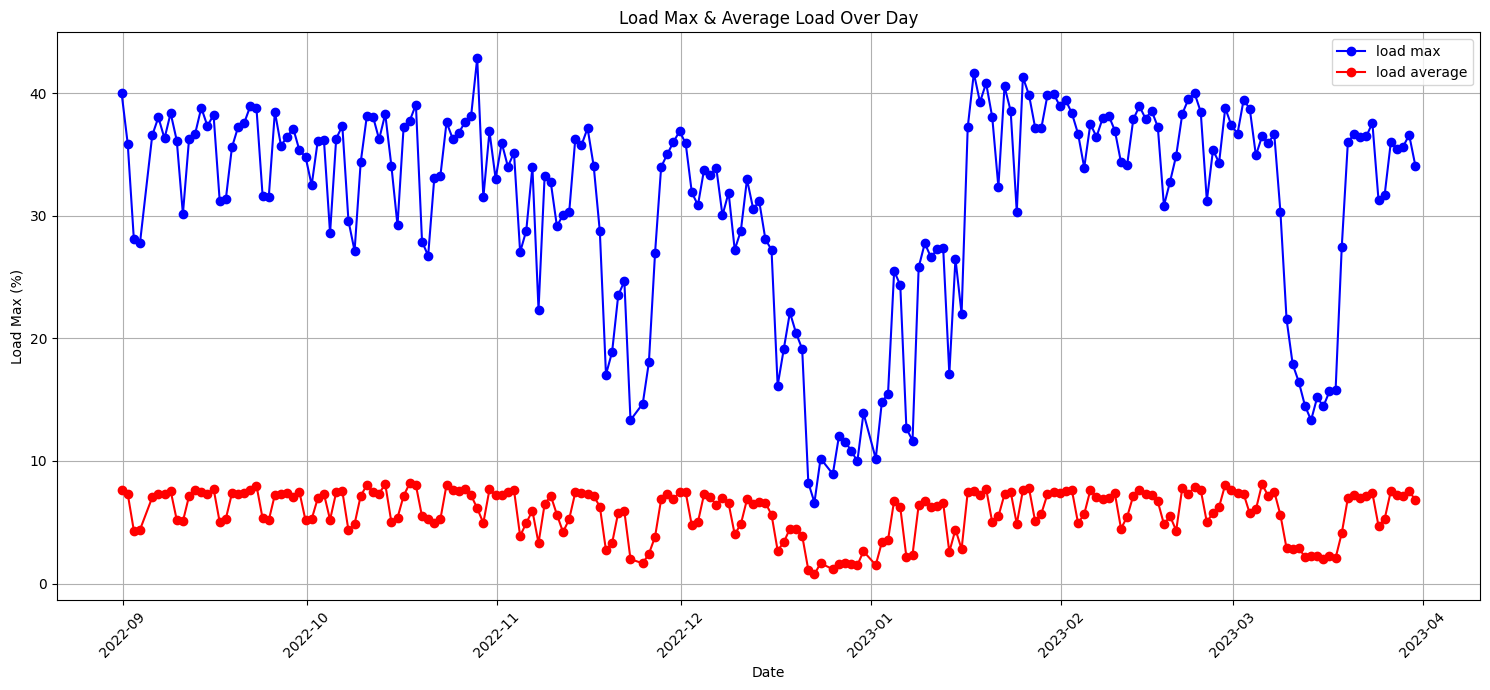

In [ ]:
load_max_per_day = dataframe.groupby('Date')['Load max'].mean().reset_index()
avg_load_per_day = dataframe.groupby('Date')['Load (Avg.)'].mean().reset_index()

plt.figure(figsize=(15,7))
plt.plot(load_max_per_day['Date'], load_max_per_day['Load max'], marker='o', linestyle='-',color='blue',label='load max')
plt.plot(avg_load_per_day['Date'], avg_load_per_day['Load (Avg.)'], marker='o', linestyle='-',color='red',label='load average')
plt.title('Load Max & Average Load Over Day')
plt.xlabel('Date')
plt.ylabel('Load Max (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.savefig('figures/Load_Max_Load_Average_Over_Time.png')
plt.show()

**Meeting notes for October 31st, 2023**

- Pick a bus route, analyze the trend of the load max and average load max and possibly predict what the load max and load average of the bus route will be like.

- Look at this data, pick a bus route that has high load max and load avg and analyze the data
Then using a ML algorithm, predict/forecast what the future load max,load avg would be.

- FB Prophet, LSTM

In [ ]:
# Next step is to possible explore Hidden Markov Models to predict and analyze passenger movement of the routes overall.

**Data Cleaning**

We need to clean the data. We also need to pick the parameters. We also need to decide what models to use for the dataset.

**Machine Learning Model**

**Train the dataset**

**Test the dataset**

**Data Visualization**